## Deliverable #2 - Interim Work in Jupyter Notebook

### Data source location:-

The Dataset is available for free download using the below link.
https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv

For overview and more info:
https://data.london.gov.uk/dataset/number-international-visitors-london


### Data source Discovery:-
I found this Dataset in one of the links provided in the Data sources in Blackboard. I went through a lot of other Datasets but I felt that this Dataset has interesting hypotheses around it and a lot of analysis can be done on it.

### Legality and Cost:-
This Dataset is absolutely free to download and legal to access as well.

### Documented EDA:-
There's no such EDA or Visualization available on the web for this Dataset.


## Performing Exploratory Data Analysis on the Dataset

* Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.

### 1. Importing the necessary Libraries

In [9]:
# including the required libraries

import pandas as pd
import numpy as np
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualisation
%matplotlib inline 
sns.set(color_codes=True)

### 2. Reading the Data from CSV to Dataframe

In [22]:
#Read the data from the csv using the download link into a Dataframe directly

data = pd.read_csv("https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv",engine='python',encoding= 'unicode_escape')


### 3. Structure of the Dataframe

In [23]:
# printing the size of the data frame which gives in the format of (rows,columns)

print('(Number of rows, Number of Columns)')
data.shape

(Number of rows, Number of Columns)


(61462, 11)

In [24]:
# data types of all the columns in the dataframe

data.dtypes

year              object
quarter           object
market            object
dur_stay          object
mode              object
purpose           object
area              object
Visits (000s)    float64
Spend (£m)       float64
Nights (000s)    float64
sample             int64
dtype: object

In [25]:
# gives the first five rows from the data frame

data.head(5)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [26]:
# gives the last five rows from the data frame

data.tail(5)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
61457,2020P,January-March,Other Africa,4-7 nights,Air,Miscellaneous,LONDON,1.695331,1.103167,8.831038,2
61458,2020P,January-March,Other Africa,8-14 nights,Air,Holiday,LONDON,1.486972,2.022254,7.836555,1
61459,2020P,January-March,Other Africa,8-14 nights,Air,VFR,LONDON,2.416554,1.847152,63.894432,2
61460,2020P,January-March,Other Africa,15+ nights,Air,Holiday,LONDON,2.472653,1.006109,35.080377,2
61461,2020P,January-March,Other Africa,15+ nights,Air,VFR,LONDON,4.124325,3.960705,134.909755,4


### 4. Dropping irrelevant columns

* This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution which enables to focus on the relevant columns.
* Here the 'sample', 'mode' columns as no significance with my hypothesis i am dropping the columns.

In [28]:
visitors_data = data.drop(['sample', 'mode'], axis=1)
visitors_data.head(5)

,year,quarter,market,dur_stay,purpose,area,Visits (000s),Spend (£m),Nights (000s)
0,2002,January-March,Belgium,1-3 nights,Holiday,LONDON,3.572186,0.969138,6.954456
1,2002,January-March,Belgium,1-3 nights,Business,LONDON,9.284226,2.399577,12.604959
2,2002,January-March,Belgium,1-3 nights,VFR,LONDON,0.877182,0.089833,2.153128
3,2002,January-March,Belgium,1-3 nights,Miscellaneous,LONDON,0.163874,0.010160,0.163874
4,2002,January-March,Belgium,1-3 nights,Business,LONDON,1.648670,0.016789,1.650300


### 5. Renaming the columns

* In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach which improves the readability of the data set.

In [30]:
visitors_data = visitors_data.rename(columns={'year': 'YEAR', 'quarter': 'QUARTER', 'market': 'MARKET_PLACE','dur_stay': 'STAY_DURATION', 'purpose': 'PURPOSE_OF_VISIT','area': 'PLACE_OF_VISIT', 'Visits (000s)': 'VISITS', 'Spend (£m)': 'AMOUNT_SPENT', 'Nights (000s)': 'NIGHTS_STAYED'})

visitors_data.head(5)


,YEAR,QUARTER,MARKET_PLACE,STAY_DURATION,PURPOSE_OF_VISIT,PLACE_OF_VISIT,VISITS,AMOUNT_SPENT,NIGHTS_STAYED
0,2002,January-March,Belgium,1-3 nights,Holiday,LONDON,3.572186,0.969138,6.954456
1,2002,January-March,Belgium,1-3 nights,Business,LONDON,9.284226,2.399577,12.604959
2,2002,January-March,Belgium,1-3 nights,VFR,LONDON,0.877182,0.089833,2.153128
3,2002,January-March,Belgium,1-3 nights,Miscellaneous,LONDON,0.163874,0.010160,0.163874
4,2002,January-March,Belgium,1-3 nights,Business,LONDON,1.648670,0.016789,1.650300


In [32]:
# The shape of the data after dropping and renaming the columns

visitors_data.shape

(61462, 9)

In [36]:
# counting the data before dropping the duplicate rows
visitors_data.count()

YEAR                61462
QUARTER             61462
MARKET_PLACE        61462
STAY_DURATION       61462
PURPOSE_OF_VISIT    61462
PLACE_OF_VISIT      61462
VISITS              61462
AMOUNT_SPENT        61462
NIGHTS_STAYED       61462
dtype: int64

### 6. Dropping the duplicate rows

* This is often a handy thing to do because a huge data set as in this case contains 61462 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [38]:
# Rows containing duplicate data
duplicate_rows = visitors_data[visitors_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (0, 9)


* From the above result we can see that there are no duplicate rows present in the dataset.

### 7. Dropping the missing or null values

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, I just dropped that missing values. 

In [40]:
# Finding the null values.
print(visitors_data.isnull().sum())

YEAR                0
QUARTER             0
MARKET_PLACE        0
STAY_DURATION       0
PURPOSE_OF_VISIT    0
PLACE_OF_VISIT      0
VISITS              0
AMOUNT_SPENT        0
NIGHTS_STAYED       0
dtype: int64


* From the above result we can see that there are no missing values in the dataset

In [43]:
#Check for unique values per column present in the Data
visitors_data.nunique()

YEAR                   19
QUARTER                 4
MARKET_PLACE           62
STAY_DURATION           4
PURPOSE_OF_VISIT        5
PLACE_OF_VISIT          1
VISITS              55965
AMOUNT_SPENT        60614
NIGHTS_STAYED       60368
dtype: int64

* From the above result we can see the unique values per column

### 8. Just go through the DataFrame visitors_data for summary statistics

#### Using describe function

* The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data

In [42]:
#Just for an overview look at all the columns

visitors_data.describe(include='all')

,YEAR,QUARTER,MARKET_PLACE,STAY_DURATION,PURPOSE_OF_VISIT,PLACE_OF_VISIT,VISITS,AMOUNT_SPENT,NIGHTS_STAYED
count,61462,61462,61462,61462,61462,61462,61462.000000,61462.000000,61462.000000
unique,19,4,62,4,5,1,NaN,NaN,NaN
top,2010,July-September,France,1-3 nights,Holiday,LONDON,NaN,NaN,NaN
freq,3601,16827,2611,19710,19695,61462,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.927651,3.086634,30.300852
std,NaN,NaN,NaN,NaN,NaN,NaN,10.061362,7.243874,61.898302
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000103,0.000000,0.000309
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.822888,0.321693,3.901581
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.797305,1.047351,10.676935
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.416618,3.007542,29.483044


### 9. Sample Plots

#### i. Plotting histograms to understand the columnar data and their significance to draw the hypothesis in future

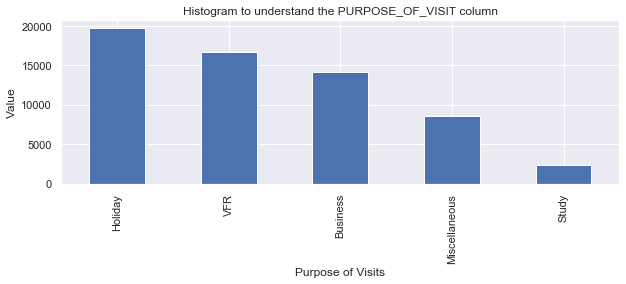

In [54]:
# Plotting a Histogram
visitors_data.PURPOSE_OF_VISIT.value_counts().nlargest(100).plot(kind= "bar", figsize=(10,3))
plt.title("Histogram to understand the PURPOSE_OF_VISIT column")
plt.xlabel("Purpose of Visits");
plt.ylabel("Value");

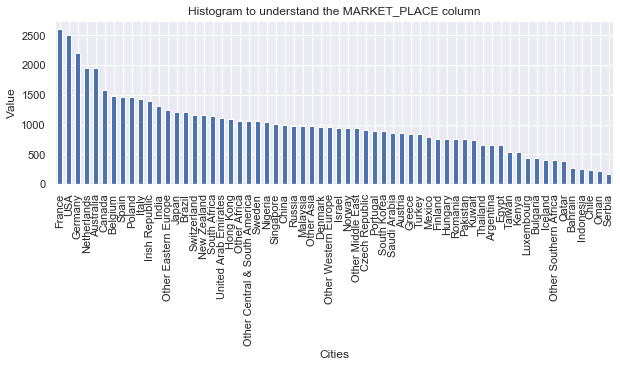

In [55]:
# Plotting a Histogram
visitors_data.MARKET_PLACE.value_counts().nlargest(100).plot(kind= "bar", figsize=(10,3))
plt.title("Histogram to understand the MARKET_PLACE column")
plt.xlabel("Cities");
plt.ylabel("Value");

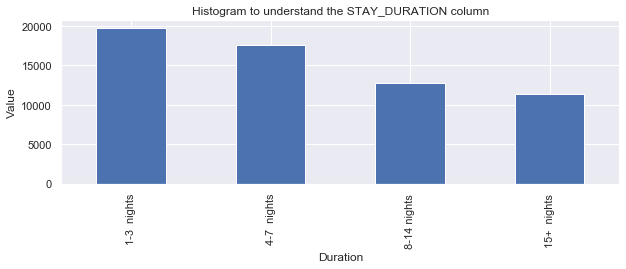

In [57]:
# Plotting a Histogram
visitors_data.STAY_DURATION.value_counts().nlargest(100).plot(kind= "bar", figsize=(10,3))
plt.title("Histogram to understand the STAY_DURATION column")
plt.xlabel("Duration");
plt.ylabel("Value");

#### ii. Drawing a pairplot to understand the relationship between the columns

* To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. 

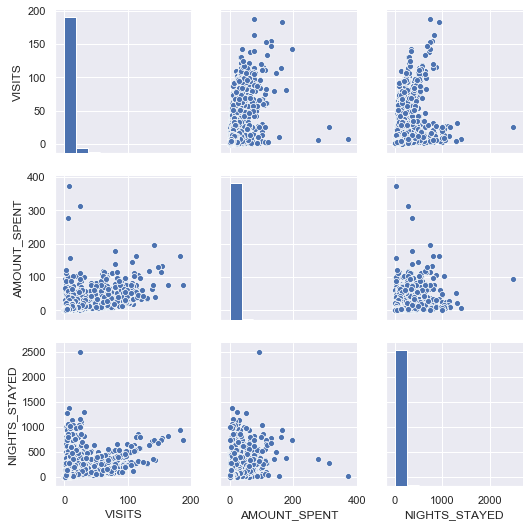

In [58]:
sns.pairplot(visitors_data)

### 10. Breif Summary from deliverables2

* Performed exploratory analysis on the data.
* Organized the data by Data Cleaning.
* Removed the uninformative data and also by not loosing the important data.
* Plotting the columns to draw the inferences and to understand the dependency of the data.
* By the Data Visualisation i tried to improve the understanding and readbility of the dataframe.